In [1]:
from collections import Counter
from functools import reduce
import math
import random
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [2]:
with (open('set_1.csv', 'r') as f1, 
      open('set_2.csv', 'r') as f2, 
      open('set_3.csv', 'r') as f3):
          
    df1, df2, df3 = map(lambda s: list(map(float, s.split(','))), [f1.read(), f2.read(), f3.read()])

In [3]:
print(df1[:10])
print(df2[:10])
print(df3[:10])

[3.0, 1.0, 1.0, 9.0, 8.0, 7.0, 3.0, 5.0, 5.0, 2.0]
[90.547448, 80.548716, 92.992958, 33.050472, 142.98364, -100.226411, 57.025498, 97.936745, -5.646959, -117.066173]
[0.002163, 0.023507, 0.067606, 0.012753, 0.210471, 0.124425, 0.375318, 0.221, 0.06802, 0.003842]


In [4]:
def calculate_mean(data):
    """Mean"""
    return sum(data) / len(data)

In [5]:
def calculate_variance(data):
    """Variance"""
    mean = calculate_mean(data)
    return sum((x - mean) ** 2 for x in data) / len(data)

In [6]:
def calculate_standard_deviation(data):
    """Standard Deviation"""
    variance = calculate_variance(data)
    return math.sqrt(variance)

In [7]:
def filter_outliers(data):
    """Filter outliers using the interquartile range (IQR) method."""
    quartiles = np.percentile(data, [25, 75])
    iqr = quartiles[1] - quartiles[0]
    lower_bound = quartiles[0] - 1.5 * iqr
    upper_bound = quartiles[1] + 1.5 * iqr
    filtered_data = [x for x in data if lower_bound <= x <= upper_bound]
    return filtered_data

In [8]:
def plot_histograms(data_sets, titles):
    """Plot histograms for the given data sets."""
    num_data_sets = len(data_sets)
    plt.figure(figsize=(15, 5))
    for i, (data, title) in enumerate(zip(data_sets, titles), start=1):
        plt.subplot(1, num_data_sets, i)
        plt.hist(data, bins=50, color='skyblue', edgecolor='black')
        plt.title(title)
        plt.xlabel('Value')
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


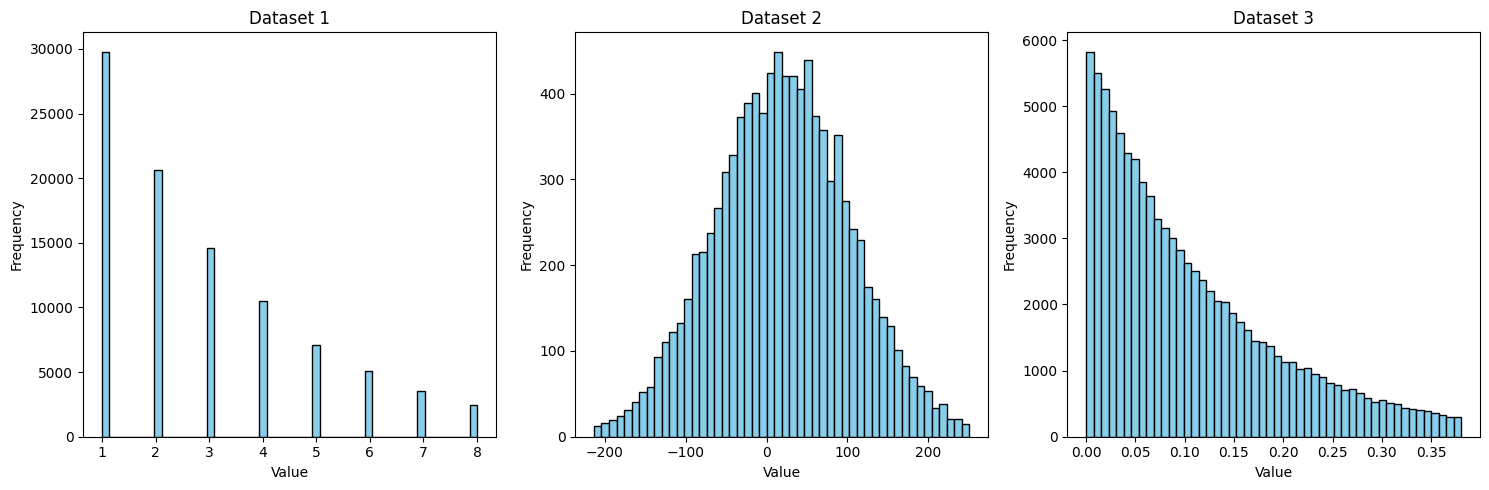

In [9]:
filtered_1 = filter_outliers(df1)
filtered_2 = filter_outliers(df2)
filtered_3 = filter_outliers(df3)

data_sets = [filtered_1, filtered_2, filtered_3]
titles = ['Dataset 1', 'Dataset 2', 'Dataset 3']

plot_histograms(data_sets, titles)


In [10]:
data_sets = [df1, df2, df3]

def is_approximately_equal(value1, value2, tolerance=1e-6):
    return abs(value1 - value2) < tolerance

def test_functions_on_data(data, data_name):
    """
    Test the given functions on the provided data and compare the results with numpy library.
    
    Parameters:
        data (list): The dataset to test the functions on.
        data_name (str): The name of the dataset.
    """

    mean_calculated = calculate_mean(data)
    mean_numpy = np.mean(data)
    assert is_approximately_equal(mean_calculated, mean_numpy), f"Mean values differ for dataset {data_name}"

    variance_calculated = calculate_variance(data)
    variance_numpy = np.var(data)
    assert is_approximately_equal(variance_calculated, variance_numpy), f"Variance values differ for dataset {data_name}"

    std_dev_calculated = calculate_standard_deviation(data)
    std_dev_numpy = np.std(data)
    assert is_approximately_equal(std_dev_calculated, std_dev_numpy), f"Standard deviation values differ for dataset {data_name}"

for i, data in enumerate(data_sets, start=1):
    data_name = f"df{i}"
    print(f"Testing functions on {data_name}:")
    test_functions_on_data(data, data_name)
    print(f"All tests passed successfully for {data_name}!")
    print()


Testing functions on df1:
All tests passed successfully for df1!

Testing functions on df2:
All tests passed successfully for df2!

Testing functions on df3:
All tests passed successfully for df3!



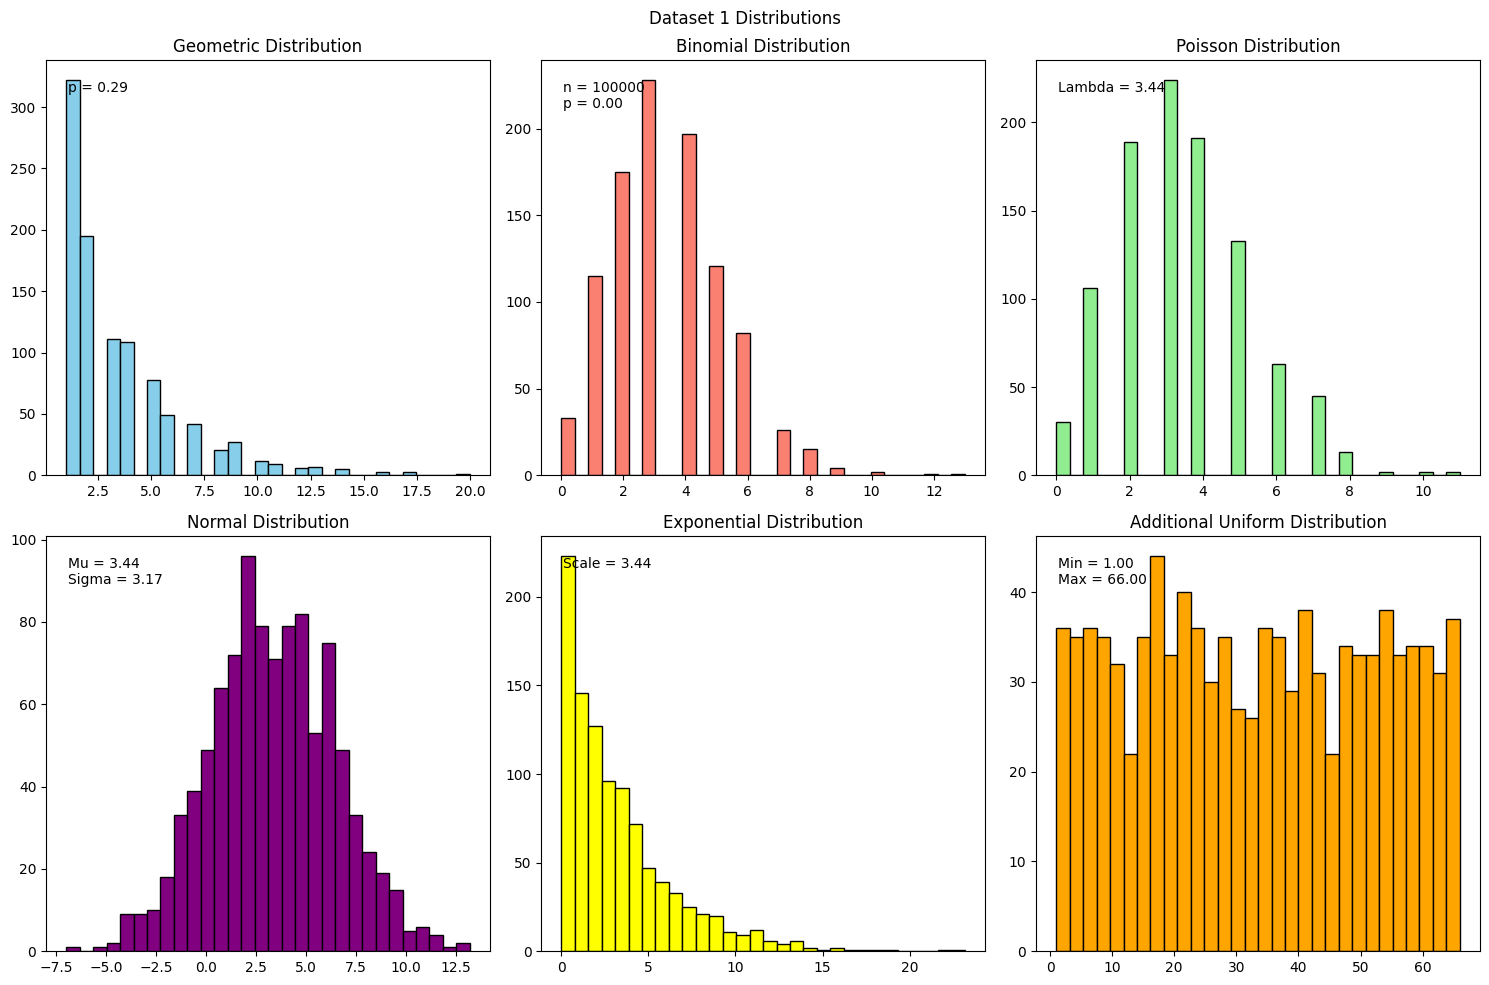

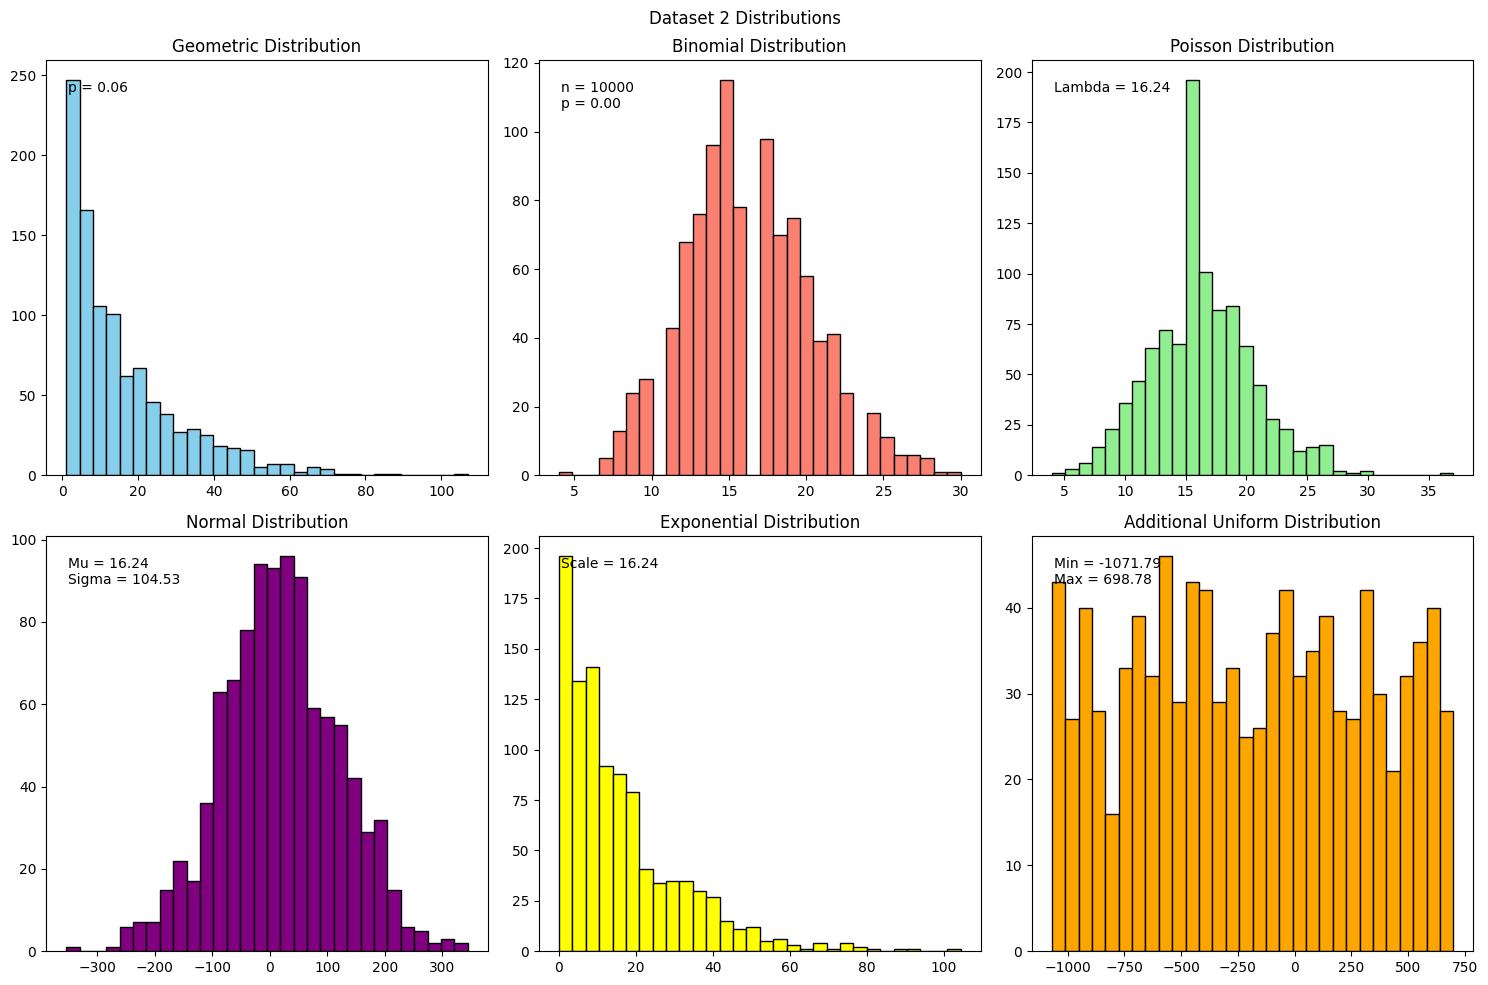

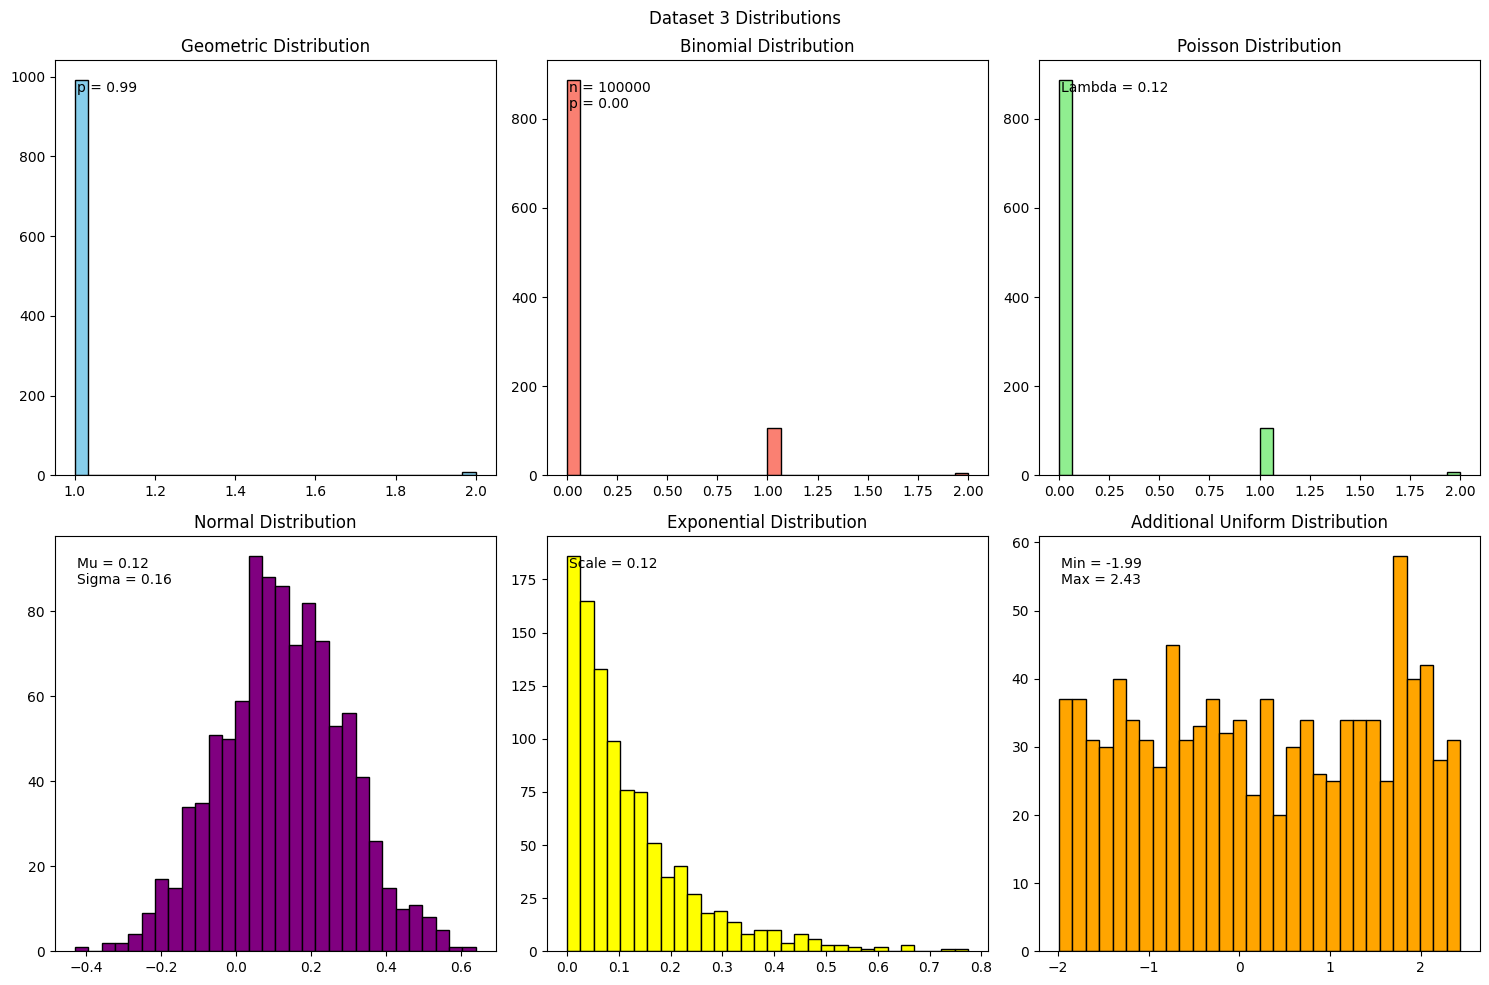

In [11]:
def plot_distributions(data, title):
    """Plot various distributions for the given data."""
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle(title)

    # Геометрическое распределение
    p_geometric = min(1 / calculate_mean(data), 0.99)  # Вероятность не должна превышать 1
    geometric_params = np.random.geometric(p=p_geometric, size=1000)
    axes[0, 0].hist(geometric_params, bins=30, color='skyblue', edgecolor='black')
    axes[0, 0].set_title('Geometric Distribution')
    axes[0, 0].text(0.05, 0.95, f'p = {p_geometric:.2f}', 
                    verticalalignment='top', horizontalalignment='left', 
                    transform=axes[0, 0].transAxes, fontsize=10)

    # Биномиальное распределение
    n_binomial = len(data)
    p_binomial = calculate_mean(data) / n_binomial
    binomial_params = np.random.binomial(n=n_binomial, p=p_binomial, size=1000)
    axes[0, 1].hist(binomial_params, bins=30, color='salmon', edgecolor='black')
    axes[0, 1].set_title('Binomial Distribution')
    axes[0, 1].text(0.05, 0.95, f'n = {n_binomial}\np = {p_binomial:.2f}', 
                    verticalalignment='top', horizontalalignment='left', 
                    transform=axes[0, 1].transAxes, fontsize=10)

    # Распределение Пуассона
    lambda_poisson = calculate_mean(data)
    poisson_params = np.random.poisson(lam=lambda_poisson, size=1000)
    axes[0, 2].hist(poisson_params, bins=30, color='lightgreen', edgecolor='black')
    axes[0, 2].set_title('Poisson Distribution')
    axes[0, 2].text(0.05, 0.95, f'Lambda = {lambda_poisson:.2f}', 
                    verticalalignment='top', horizontalalignment='left', 
                    transform=axes[0, 2].transAxes, fontsize=10)

    # Нормальное распределение
    mean_normal = calculate_mean(data)
    std_dev_normal = calculate_standard_deviation(data)
    normal_params = np.random.normal(loc=mean_normal, scale=std_dev_normal, size=1000)
    axes[1, 0].hist(normal_params, bins=30, color='purple', edgecolor='black')
    axes[1, 0].set_title('Normal Distribution')
    axes[1, 0].text(0.05, 0.95, f'Mu = {mean_normal:.2f}\nSigma = {std_dev_normal:.2f}', 
                    verticalalignment='top', horizontalalignment='left', 
                    transform=axes[1, 0].transAxes, fontsize=10)

    # Экспоненциальное распределение
    scale_exponential = calculate_mean(data)
    exponential_params = np.random.exponential(scale=scale_exponential, size=1000)
    axes[1, 1].hist(exponential_params, bins=30, color='yellow', edgecolor='black')
    axes[1, 1].set_title('Exponential Distribution')
    axes[1, 1].text(0.05, 0.95, f'Scale = {scale_exponential:.2f}', 
                    verticalalignment='top', horizontalalignment='left', 
                    transform=axes[1, 1].transAxes, fontsize=10)

    # Равномерное
    uniform_params = np.random.uniform(low=min(data), high=max(data), size=1000)
    axes[1, 2].hist(uniform_params, bins=30, color='orange', edgecolor='black')
    axes[1, 2].set_title('Additional Uniform Distribution')
    axes[1, 2].text(0.05, 0.95, f'Min = {min(data):.2f}\nMax = {max(data):.2f}', 
                verticalalignment='top', horizontalalignment='left', 
                transform=axes[1, 2].transAxes, fontsize=10)

    plt.tight_layout()
    plt.show()

plot_distributions(df1, 'Dataset 1 Distributions')
plot_distributions(df2, 'Dataset 2 Distributions')
plot_distributions(df3, 'Dataset 3 Distributions')
